# Sample Stopping Distances
The purpose of this notebook is to study how stopping distances varies for projectiles that enter the surface at different locations.

We run the results in a separate script and plot the results here.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.neighbors import KernelDensity
from tqdm import tqdm
from glob import glob
import pickle as pkl
import pandas as pd
import numpy as np
import json
import os

## Run Many Trajectories in the $\left<1 1 1\right>$ Direction
This will simulate the stopping distances for projectiles impinging on a $(111)$ Al surface. The direction does not vary, so we only vary the starting location. 

In [2]:
data_dir = 'v=4.00-d=1_1_1'

In [3]:
stop_dists_111 = pd.read_csv(os.path.join(data_dir, 'stop_dists.csv'))

In [4]:
stop_dists_111['stopping_dist'].describe()

count       128.000000
mean      80945.140507
std       15834.277795
min       45092.577712
25%       66569.299701
50%       84945.082341
75%       95515.709195
max      101336.847940
Name: stopping_dist, dtype: float64

In [5]:
iqr_111 = np.diff(np.percentile(stop_dists_111['stopping_dist'], [25, 75]))[0]
print(f'IQR: {iqr_111:.1f}')

IQR: 28946.4


Load in all of the trajectories

In [6]:
stop_trajs_111 = [pd.read_json(x) for x in glob(os.path.join(data_dir, 'traj_*.json'))]

In [7]:
def make_plot(ax, stop_trajs, stop_dists):
    # Plot the trajectories
    ax.set_zorder(2)
    for traj in stop_trajs:
        ax.plot(traj['displacement'], traj['velocity'], 'b-', lw=0.5, alpha=0.4, color='crimson', zorder=1)
    ax.set_facecolor('none')

    # Plot the KDE
    x = np.linspace(0, 105000, 48)
    ax2 = ax.twinx()
    ax2.set_zorder(1)
    ax2.hist(stop_dists['stopping_dist'], bins=x)
    ax2.set_yticklabels([])
    ax2.set_ylim([0, max(ax2.get_ylim())])

    # Plot the stopping distance and time
    ax.set_xlim(ax.get_xlim())
    ax.set_ylim(ax.get_ylim())
    ax.plot(ax.get_xlim(), [0.4]*2, 'k--', lw=0.5)

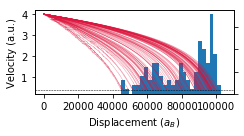

In [8]:
fig, ax = plt.subplots(figsize=(3.5, 2))

make_plot(ax, stop_trajs_111, stop_dists_111)
ax.set_xlabel('Displacement ($a_B$)')
ax.set_ylabel('Velocity (a.u.)')

fig.tight_layout()
fig.savefig(os.path.join('figures', '111-stopping-curve.png'), dpi=320)

## Run Many Trajectories in the $\left<1 0 0\right>$ Direction
This will simulate the stopping distances for projectiles impinging on a $(100)$ Al surface. The direction does not vary, so we only vary the starting location. 

In [9]:
data_dir = 'v=4.00-d=1_0_0'

In [10]:
stop_dists_100 = pd.read_csv(os.path.join(data_dir, 'stop_dists.csv'))

In [11]:
stop_dists_100['stopping_dist'].describe()

count       128.000000
mean      85671.914247
std       19880.788698
min       32414.746687
25%       74554.106984
50%       94184.350535
75%      101698.164517
max      103615.005294
Name: stopping_dist, dtype: float64

In [12]:
iqr = np.diff(np.percentile(stop_dists_100['stopping_dist'], [25, 75]))[0]
print(f'IQR: {iqr:.1f}. {100 * (1 - iqr/iqr_111):.2f}% smaller than 111')

IQR: 27144.1. 6.23% smaller than 111


Load in all of the trajectories

In [13]:
stop_trajs_100 = [pd.read_json(x) for x in glob(os.path.join(data_dir, 'traj_*.json'))]

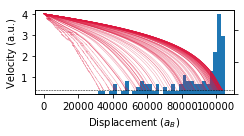

In [14]:
fig, ax = plt.subplots(figsize=(3.5, 2))

make_plot(ax, stop_trajs_100, stop_dists_100)
ax.set_xlabel('Displacement ($a_B$)')
ax.set_ylabel('Velocity (a.u.)')

fig.tight_layout()
fig.savefig(os.path.join('figures', '100-stopping-curve.png'), dpi=320)

## Run Many Trajectories in a Random Direction
This will simulate the stopping distances for projectiles traveling random directions

In [15]:
data_dir = 'v=4.00-d=random'

In [16]:
stop_dists = pd.read_csv(os.path.join(data_dir, 'stop_dists.csv'))

In [17]:
stop_dists['stopping_dist'].describe()

count       128.000000
mean      87746.130723
std       19763.609222
min       54490.046626
25%       74451.562617
50%       85805.054525
75%       97303.150885
max      167972.117301
Name: stopping_dist, dtype: float64

Load in all of the trajectories

In [18]:
stop_trajs = [pd.read_json(x) for x in glob(os.path.join(data_dir, 'traj_*.json'))]

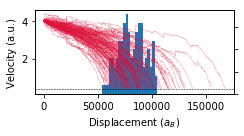

In [19]:
fig, ax = plt.subplots(figsize=(3.5, 2))

make_plot(ax, stop_trajs, stop_dists)
ax.set_xlabel('Displacement ($a_B$)')
ax.set_ylabel('Velocity (a.u.)')

fig.tight_layout()
fig.savefig(os.path.join('figures', 'random-stopping-curve.png'), dpi=320)

**TODO**: We probably need to re-run with a better integration timestep.

## Plot of both (100) and (111) for paper
Let's make a vertical single-column figure that will have both

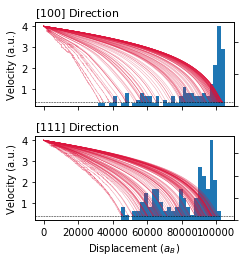

In [20]:
fig, axs = plt.subplots(2, 1, figsize=(3.5, 3.75), sharex=True)

make_plot(axs[0], stop_trajs_100, stop_dists_100)
axs[0].set_title('$\\left[100\\right]$ Direction', loc='left', fontsize=11)

make_plot(axs[1], stop_trajs_111, stop_dists_111)
axs[1].set_title('$\\left[111\\right]$ Direction', loc='left', fontsize=11)

for ax in axs:
    ax.set_ylabel('Velocity (a.u.)')
ax.set_xlabel('Displacement ($a_B$)')

fig.tight_layout()

fig.savefig(os.path.join('figures', '100_111-combined-stopping-dists.png'), dpi=320)
fig.savefig(os.path.join('figures', '100_111-combined-stopping-dists.pdf'))